# Energy Requirements of Mining Silica

This journal creates a baseline for the energy required to mine and refine quartz or industrial silica deposits into silica sand usable for either the glass or mg-si industry. 

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
cwd = os.getcwd() #grabs current working directory
skipcols = ['Source', 'Notes']
e_minesilica_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-miningsilica.csv",
                                     index_col='year', usecols=lambda x: x not in skipcols)

Text(0.5, 1.0, 'Mining_silica_kWhpkg')

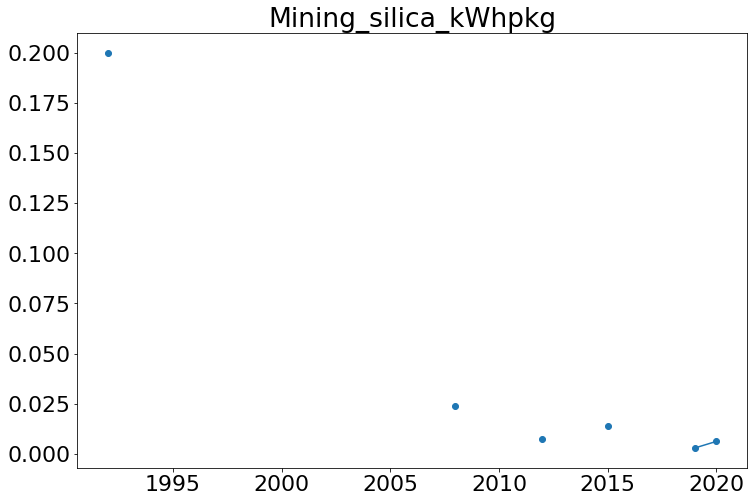

In [3]:
plt.plot(e_minesilica_raw, marker='o')
plt.title(e_minesilica_raw.columns[0])

The first point is from G. J. M. Phylipsen and E. A. Alsema, “Environmental life-cycle assessment of multicrystalline silicon solar cell modules,” Netherlands Agency for Energy and the Environment,NOVEM, Netherlands, Sep. 1995. and has the note that this energy is "less than 0.3% of reduction energy" for MG-Si. However, it appears to be an order of magnitude higher than the others, I don't think this is empirical, and I have the least confidence in this number. Therefore, we will drop this point.

The last two points are from S. M. Heidari and A. Anctil, “Country-specific carbon footprint and cumulative energy demand of metallurgical grade silicon production for silicon photovoltaics,” Resources, Conservation and Recycling, vol. 180, p. 106171, May 2022, doi: 10.1016/j.resconrec.2022.106171. The lower energy represents the energy required to prepare high quality silica deposits (mining and washing, small amounts of magnetic separation and floation). The higher energy requirement represents industrial or low quality silica deposits which require significant benefication. This one is a blending of 3 methods (magnetic separation, flotation, and gravity). Currently, because China is producing the majority of MG-Si and they have no high quality silca deposits, we will assume that the energy will remain at the higher point into future.

Energy values associated with the creation of silica sand were used, and other side-related processes were excluded. This can be thought of as scope 1 energy requirements.

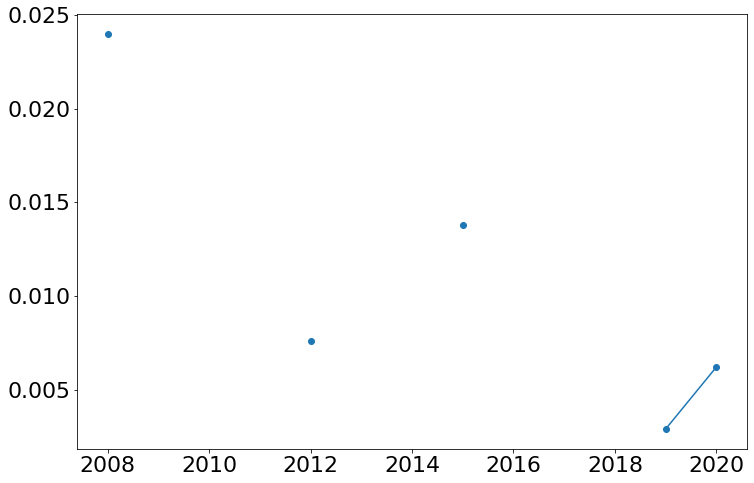

In [4]:
e_minesilica_tidy = e_minesilica_raw.copy()
e_minesilica_tidy.loc[e_minesilica_tidy.idxmax(),]=np.nan #find the max and set it to Nan
plt.plot(e_minesilica_tidy, marker='o')

These data points are all good, and generally represent different locations and proceses. We will use these as optional values, rather than a time series, depending on location and quality of silica supply.

In [5]:
cwd = os.getcwd() #grabs current working directory
#skipcols = ['Source', 'Notes']
e_minesilica_meta = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-miningsilica.csv",
                                     index_col='year')

In [6]:
e_minesilica = e_minesilica_meta.dropna()
e_minesilica.drop([1992], inplace=True)
e_minesilica.loc[:,'Location'] = ['China', 'Croatia', 'Poland', 'USA', 'China']
e_minesilica.loc[:,'Quality'] = ['Low', 'Industrial', 'Industrial','High','Low']

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_3996\328584030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_minesilica.drop([1992], inplace=True)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_3996\328584030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_minesilica.loc[:,'Location'] = ['China', 'Croatia', 'Poland', 'USA', 'China']
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_3996\328584030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [7]:
e_minesilica

,Mining_silica_kWhpkg,Source,Notes,Location,Quality
year,,,,,
2008,0.02400,"M. Fan, Z. Yu, W. Ma, and L. Li, “Life Cycle A...",from a 2008 thesis LCA,China,Low
2012,0.00760,"A. Grbeš, A Life Cycle Assessment of Silica Sa...",avg of 3 methods in Croatia,Croatia,Industrial
2015,0.01380,"J. Mitterpach, E. Hroncová, J. Ladomerský, and...",data from Polish sand mining facility,Poland,Industrial
2019,0.00289,"S. M. Heidari and A. Anctil, “Country-specific...","USA, HQ silica",USA,High
2020,0.00620,"S. M. Heidari and A. Anctil, “Country-specific...",LQ silica,China,Low


For now, we will select the Heidari and Anctil 2022 Low Quality China data point, since a majority of MG-Si and glass are coming from China.